In [102]:
!pip install scrapethat

In [103]:
from scrapethat import *
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_bar, coord_flip, element_text
import statsmodels.formula.api as smf
import numpy as np

###Getting the link from the alberlet.hu website's first page's first element

In [104]:
main_webpage = read_cloud('https://www.alberlet.hu/kiado_alberlet/ingatlan-tipus:lakas/megye:budapest/keres:normal/limit:24')

In [105]:
main_webpage.select('.col-xl-3')[0].select('.advert-data')[0].select_one('a')['href']

'/kiado_alberlet/budapest-VIII-kerulet-tomo-utca--50m2-2-szoba_752985'

###Getting all the links from the first page

In [106]:
links_from_first_page = [
    x.select_one('a')['href'] for x in main_webpage.select('.col-xl-3 .advert-data') if x.select_one('a')
]

print(links_from_first_page)

['/kiado_alberlet/budapest-VIII-kerulet-tomo-utca--50m2-2-szoba_752985', '/kiado_alberlet/budapest-III-kerulet-punkosdfurdo-utca-47m2-2-szoba_756171', '/kiado_alberlet/budapest-VI-kerulet-nagymezo-utca-60m2-3-szoba_753763', '/kiado_alberlet/budapest-V-kerulet-petofi-sandor-utca-66m2-2-szoba_755961', '/kiado_alberlet/budapest-V-kerulet-zrinyi-utca-47m2-1-szoba_725312', '/kiado_alberlet/budapest-II-kerulet-tarogato-ut-70m2-3-szoba_750733', '/kiado_alberlet/budapest-XIV-kerulet-kerepesi-ut--37m2-1-szoba_756113', '/kiado_alberlet/budapest-XII-kerulet-taltos-utca--50m2-2-szoba_754877', '/kiado_alberlet/budapest-IX-kerulet-erkel-utca-45m2-2-szoba_756112', '/kiado_alberlet/budapest-XIII-kerulet-cserhalom--45m2-2-szoba_755489', '/kiado_alberlet/budapest-XIV-kerulet-kalocsai-utca-32m2-1-szoba_676177', '/kiado_alberlet/budapest-II-kerulet-torokvesz-ut-78m2-3-szoba_755524', '/kiado_alberlet/budapest-XI-kerulet-tars-utca-27m2-1-szoba_756086', '/kiado_alberlet/budapest-II-kerulet-filler-utca-72m2-2

In [107]:
len(links_from_first_page)

24

In [108]:
full_links = ['https://www.alberlet.hu/' + link for link in links_from_first_page]
full_links[0:3]

['https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-tomo-utca--50m2-2-szoba_752985',
 'https://www.alberlet.hu//kiado_alberlet/budapest-III-kerulet-punkosdfurdo-utca-47m2-2-szoba_756171',
 'https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-nagymezo-utca-60m2-3-szoba_753763']

###Getting links from other pages as well

In [109]:
page = read_cloud('https://www.alberlet.hu/kiado_alberlet/page:2/ingatlan-tipus:lakas/megye:budapest/keres:normal/limit:24')
links_from_second_page = [
    x.select_one('a')['href'] for x in page.select('.col-xl-3 .advert-data') if x.select_one('a')
]

print(links_from_second_page)


['/kiado_alberlet/budapest-V-kerulet-kecskemeti-utca-68m2-2-szoba_756179', '/kiado_alberlet/budapest-II-kerulet-trombitas-ut-72m2-3-szoba_756178', '/kiado_alberlet/budapest-XIV-kerulet-abonyi-utca-12m2-1-szoba_756177', '/kiado_alberlet/budapest-III-kerulet-kadosa-utca-54m2-3-szoba_756175', '/kiado_alberlet/budapest-IX-kerulet-nadasdy-utca-38m2-2-szoba_756167', '/kiado_alberlet/budapest-III-kerulet-timar-utca-42m2-1-szoba_756166', '/kiado_alberlet/budapest-XIV-kerulet-istvanmezei-ut-26m2-1-szoba_756162', '/kiado_alberlet/budapest-XIII-kerulet-kis-gomb-utca-44m2-2-szoba_756161', '/kiado_alberlet/budapest-XIII-kerulet-devai-utca-33m2-2-szoba_756156', '/kiado_alberlet/budapest-XIII-kerulet-pap-karoly-utca-42m2-2-szoba_756151', '/kiado_alberlet/budapest-IV-kerulet-lebstuck-m--48m2-2-szoba_756146', '/kiado_alberlet/budapest-VII-kerulet-sajo-utca-28m2-1-szoba_756140', '/kiado_alberlet/budapest-VIII-kerulet-brody-sandor-utca-65m2-3-szoba_756133', '/kiado_alberlet/budapest-VII-kerulet-karoly-ko

In [110]:
all_links = []
for i in range(1,64):
    page = read_cloud(f'https://www.alberlet.hu/kiado_alberlet/page:{i}/ingatlan-tipus:lakas/megye:budapest/keres:normal/limit:24')
    links_from_other_pages = [x.select_one('a')['href'] for x in page.select('.col-xl-3 .advert-data') if x.select_one('a')]
    all_links.extend(links_from_other_pages)


In [111]:
len(all_links)

1387

In [112]:
full_links = ['https://www.alberlet.hu/' + link for link in all_links]
full_links[0:3]

['https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-tomo-utca--50m2-2-szoba_752985',
 'https://www.alberlet.hu//kiado_alberlet/budapest-III-kerulet-punkosdfurdo-utca-47m2-2-szoba_756171',
 'https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-nagymezo-utca-60m2-3-szoba_753763']

###Getting data from each link

In [113]:
t = read_cloud(full_links[1])

In [114]:
t.select_one('#main-info .price').text

'295 000'

In [115]:
t.select_one('#main-info .address').text

'Pünkösdfürdő utcaBudapest, III. kerület'

In [116]:
t.select_one('#main-info .mb-1').text

'2 szoba, 47 m2'

In [117]:
t.select_one('.advert-infos .custom-gutter-5').select('.advert-info-title')

[<div class="advert-info-title">Épület típusa</div>,
 <div class="advert-info-title">Közös költség</div>,
 <div class="advert-info-title">Fűtés</div>,
 <div class="advert-info-title">Minimum bérlési idő</div>,
 <div class="advert-info-title">Berendezés</div>,
 <div class="advert-info-title">Különnyíló szoba</div>,
 <div class="advert-info-title">Emelet</div>,
 <div class="advert-info-title">Lift</div>,
 <div class="advert-info-title">Kilátás</div>,
 <div class="advert-info-title">Erkélyek száma</div>,
 <div class="advert-info-title">Amerikai konyha</div>,
 <div class="advert-info-title">Min. bérlési idő</div>,
 <div class="advert-info-title">Diákoknak</div>,
 <div class="advert-info-title">Mosógép van</div>,
 <div class="advert-info-title">Energiatanúsítvány</div>]

In [118]:
t.select_one('.advert-infos .custom-gutter-5').select('.advert-info-text')[0]

<div class="advert-info-text">
																											Lakás																																							</div>

In [119]:
def process_elements(html):
    texts = []
    values = []
    i = 0
    valami = html.select('.advert-info-title')
    while i < len(valami):
        texts.append(valami[i])
        valami2 = html.select('.advert-info-text')
        values.append(valami2[i].text.strip())
        i += 1

    df = pd.DataFrame({'Text': texts, 'Value': values})
    return df

In [120]:
html = t.select_one('.advert-infos .custom-gutter-5')

In [121]:
df = process_elements(html)
df

,Text,Value
0,[Épület típusa],Lakás
1,[Közös költség],15 000 Ft/hó
2,[Fűtés],Házközp. mérőórával
3,[Minimum bérlési idő],Legalább 1 év
4,[Berendezés],"Üres, gépesített"
5,[Különnyíló szoba],1
6,[Emelet],7
7,[Lift],Van
8,[Kilátás],Hegyvidéki panoráma
9,[Erkélyek száma],1


In [122]:
def process_elements(html, base_data=None):
    if base_data is None:
        base_data = {}

    titles = html.select('.advert-info-title')
    texts = html.select('.advert-info-text')

    for i in range(len(titles)):
        key = titles[i].text.strip().replace(' ', '_').lower()
        value = texts[i].text.strip()
        base_data[key] = [value]

    return pd.DataFrame(base_data)

In [123]:
df=process_elements(html)
df

,épület_típusa,közös_költség,fűtés,minimum_bérlési_idő,berendezés,különnyíló_szoba,emelet,lift,kilátás,erkélyek_száma,amerikai_konyha,min._bérlési_idő,diákoknak,mosógép_van,energiatanúsítvány
0,Lakás,15 000 Ft/hó,Házközp. mérőórával,Legalább 1 év,"Üres, gépesített",1,7,Van,Hegyvidéki panoráma,1,Van,Legalább 1 év,Igen,Igen,Nem adott


In [124]:
def extract_data_from_html(html_text):
    data = {}
    titles = html_text.split('<div class="advert-info-title">')[1:]
    for title_block in titles:
        title_end = title_block.find('</div>')
        key = title_block[:title_end].strip().replace(' ', '_').lower()

        text_start = title_block.find('<div class="advert-info-text">') + len('<div class="advert-info-text">')
        text_end = title_block.find('</div>', text_start)
        value = title_block[text_start:text_end].strip()

        data[key] = value

    return data

In [125]:
def process_elements_from_links(full_links):

    all_data = []
    for link in full_links:
        t = read_cloud(link)
        html_text = str(t.select_one('.advert-infos .custom-gutter-5'))
        advert_data = extract_data_from_html(html_text)

        advert_data['price'] = t.select_one('#main-info .price').text.strip() if t.select_one('#main-info .price') else 'Na'
        advert_data['address'] = t.select_one('#main-info .address').text.strip() if t.select_one('#main-info .address') else 'Na'
        advert_data['rooms_and_sqrt'] = t.select_one('#main-info .mb-1').text.strip() if t.select_one('#main-info .mb-1') else 'Na'
        advert_data['link'] = link

        all_data.append(advert_data)

    return pd.DataFrame(all_data)

In [126]:
df = process_elements_from_links(full_links)

In [127]:
df.head(3).T

,0,1,2
épület_típusa,Lakás,Lakás,Lakás
közös_költség,14 000 Ft/hó,15 000 Ft/hó,19 000 Ft/hó
rezsi_költség,15 000 Ft/hó,NaN,30 000 Ft/hó
fűtés,Távfűtés,Házközp. mérőórával,Cirkó
minimum_bérlési_idő,Legalább 1 év,Legalább 1 év,Legalább 1 év
beköltözhető,2024-10-15,NaN,2024-12-13
berendezés,"Részben berendezett, gépesített","Üres, gépesített","Berendezett, gépesített"
különnyíló_szoba,2,1,2
emelet,Több mint 10,7,3
lift,Van,Van,Van


In [128]:
df.head(3)

,épület_típusa,közös_költség,rezsi_költség,fűtés,minimum_bérlési_idő,beköltözhető,berendezés,különnyíló_szoba,emelet,lift,...,amerikai_konyha,városrész,gyermekbarát,hónapokra_is,bérleti_díj_hónapokra,kisállat,kaució_hónapokra,hall,dohányzás,kaució
0,Lakás,14 000 Ft/hó,15 000 Ft/hó,Távfűtés,Legalább 1 év,2024-10-15,"Részben berendezett, gépesített",2,Több mint 10,Van,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lakás,15 000 Ft/hó,NaN,Házközp. mérőórával,Legalább 1 év,NaN,"Üres, gépesített",1,7,Van,...,Van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lakás,19 000 Ft/hó,30 000 Ft/hó,Cirkó,Legalább 1 év,2024-12-13,"Berendezett, gépesített",2,3,Van,...,Van,Terézváros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.to_excel('non_clean12282.xlsx', index=False)

In [ ]:
clean = df

In [189]:
clean = pd.read_excel('non_clean12282.xlsx', engine='openpyxl')

In [190]:
clean.rename(columns={
    'épület_típusa': 'building_type',
    'közös_költség': 'common_cost',
    'rezsi_költség': 'utilities',
    'fűtés': 'heating_type',
    'minimum_bérlési_idő': 'minimum_rental_time',
    'beköltözhető' : 'move_in_date',
    'berendezés': 'furniture',
    'különnyíló_szoba': 'number_of_rooms',
    'emelet' : 'floor',
    'lift' : 'elavator',
    'kilátás' : 'sight',
    'erkélyek_száma' : 'number_of_balconies',
    'mosógép_van' : 'dishwasher',
    'energiatanúsítvány': 'energy_performance_certificate',
    'amerikai_konyha': 'american_kitchen',
    'városrész': 'neighbourhood',
}, inplace=True)

In [196]:
clean.head(3).T

,0,1,2
building_type,Lakás,Lakás,Lakás
common_cost,14 000 Ft/hó,15 000 Ft/hó,19 000 Ft/hó
utilities,15 000 Ft/hó,NaN,30 000 Ft/hó
heating_type,Távfűtés,Házközp. mérőórával,Cirkó
minimum_rental_time,Legalább 1 év,Legalább 1 év,Legalább 1 év
move_in_date,2024-10-15,NaN,2024-12-13
furniture,"Részben berendezett, gépesített","Üres, gépesített","Berendezett, gépesített"
number_of_rooms,2.0,1.0,2.0
floor,Több mint 10,7,3
elavator,Van,Van,Van


**Price**

In [199]:
clean.price[0]

'240 000'

In [202]:
clean['price'] = clean['price'].str.replace(r'\s+', '', regex=True)
clean['price'] = pd.to_numeric(clean['price'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 7 rows containing non-finite values.



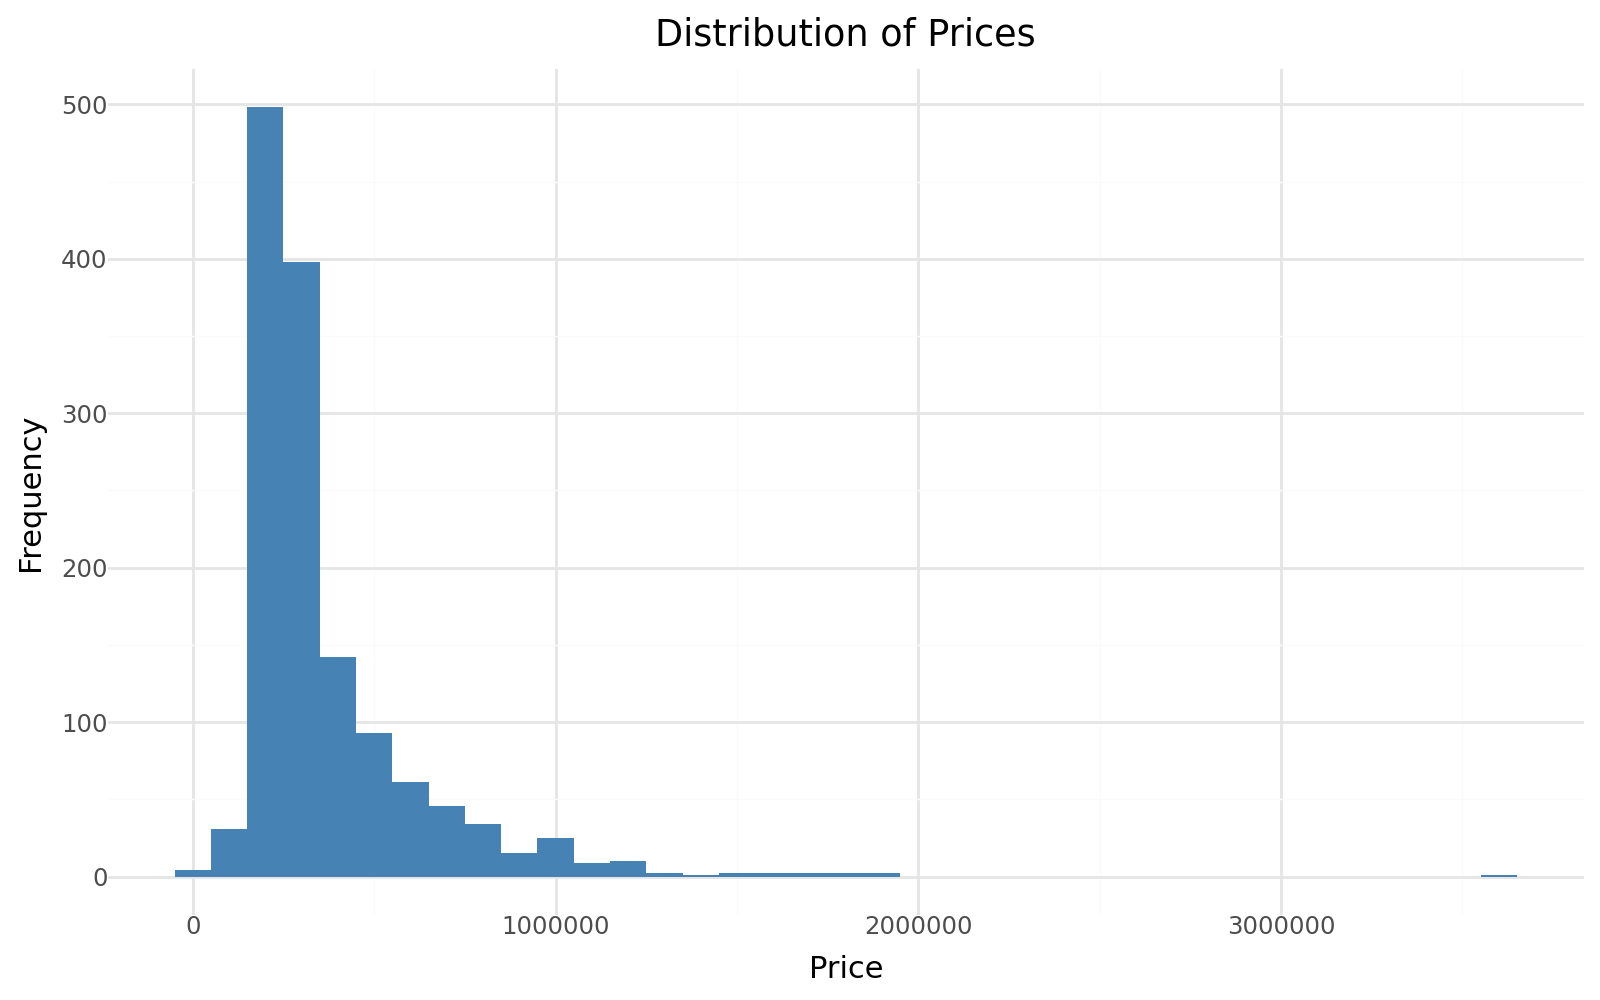

In [206]:
from plotnine import ggplot, aes, geom_histogram, labs, theme_minimal, theme

plot = (
    ggplot(clean, aes(x='price')) +
    geom_histogram(binwidth=100000, fill='steelblue') +
    labs(title='Distribution of Prices', x='Price', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [204]:
clean.price.describe().apply(lambda x: f"{x:,.0f}")

,price
count,"1,380"
mean,"374,370"
std,"257,849"
min,0
25%,"230,000"
50%,"290,000"
75%,"430,000"
max,"3,649,000"


In [207]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['price'] < 25000, 'link']

,link
691,https://www.alberlet.hu//kiado_alberlet/budapest-XX-kerulet-pozsony--54m2-2-szoba_754445
780,https://www.alberlet.hu//kiado_alberlet/budapest-XXIII-kerulet-szent-laszlo-utca-50m2-2-szoba_753967
1077,https://www.alberlet.hu//kiado_alberlet/budapest--kerulet---m2-1-szoba_747248
1384,https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-biro-lajos-utca-63m2-2-szoba_225147


In [208]:
clean = clean[clean['price'] > 1000]

I looked up the observation that costs 21 000 and in the description it says it is 210 000 so I overwrite this value.

In [209]:
clean['price'] = clean['price'].replace(21000, 210000)

<ipython-input-209-17e884bef001>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [210]:
clean.price.describe().apply(lambda x: f"{x:,.0f}")

,price
count,"1,377"
mean,"375,322"
std,"257,399"
min,"80,000"
25%,"230,000"
50%,"290,000"
75%,"430,000"
max,"3,649,000"


**Address**

Cleaning the address variable, splitting it into variable one containing only the district and one containing only the street

In [211]:
clean[['valami', 'district']] = clean['address'].str.split(',', expand=True)
clean[['street', 'valami2']] = clean['valami'].str.split('Budapest', expand=True)
clean.drop(columns=['valami', 'valami2', 'address'], inplace=True)

<ipython-input-211-78d1bd1276d1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-211-78d1bd1276d1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-211-78d1bd1276d1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-211-78d

In [212]:
district_counts = clean['district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

In [213]:
import plotly.express as px
fig2 = px.bar(district_counts, x = 'count', y = 'district',
              title = 'Number of listings per district',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

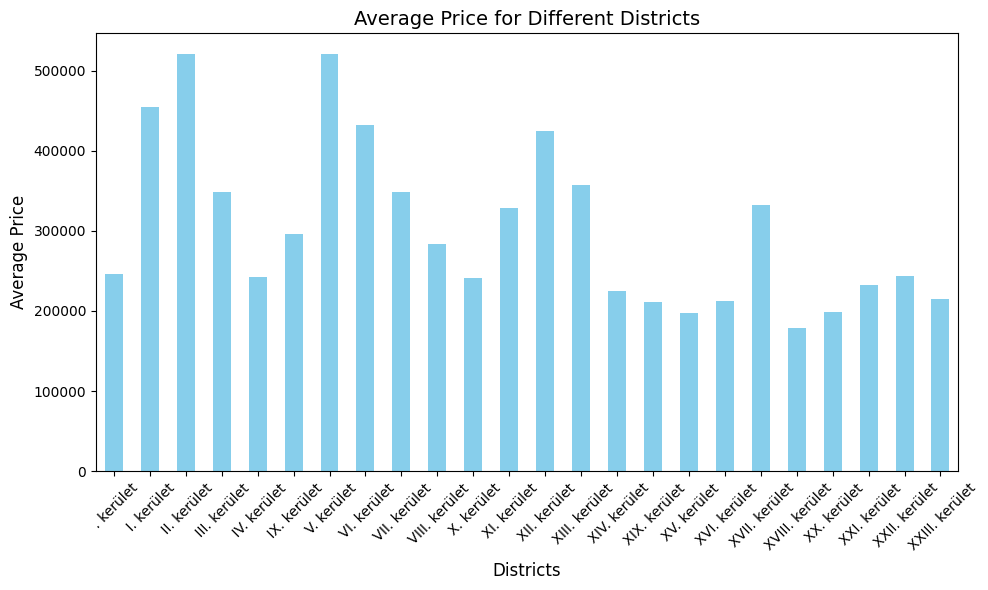

In [214]:
import matplotlib.pyplot as plt
average_price = clean.groupby('district')['price'].mean()

plt.figure(figsize=(10, 6))
average_price.plot(kind='bar', color='skyblue')
plt.title('Average Price for Different Districts', fontsize=14)
plt.xlabel('Districts', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Common cost**

Cleaning the common_cost variable, removing the Ft/hó part, removing extra spaces and converting it to be numeric

In [215]:
clean[['common_cost', 'valami']] = clean['common_cost'].str.split('Ft/hó', expand=True)
clean['common_cost'] = clean['common_cost'].str.replace(r'\s+', '', regex=True)
clean['common_cost'] = pd.to_numeric(clean['common_cost'], errors='coerce')
clean.drop(columns=['valami'], inplace=True)

<ipython-input-215-ec7094a8010b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-215-ec7094a8010b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-215-ec7094a8010b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-215-ec7

In [216]:
clean.common_cost.describe()

,common_cost
count,1106.000000
mean,24155.515371
std,18545.364494
min,1000.000000
25%,15000.000000
50%,20000.000000
75%,30000.000000
max,309000.000000


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 271 rows containing non-finite values.



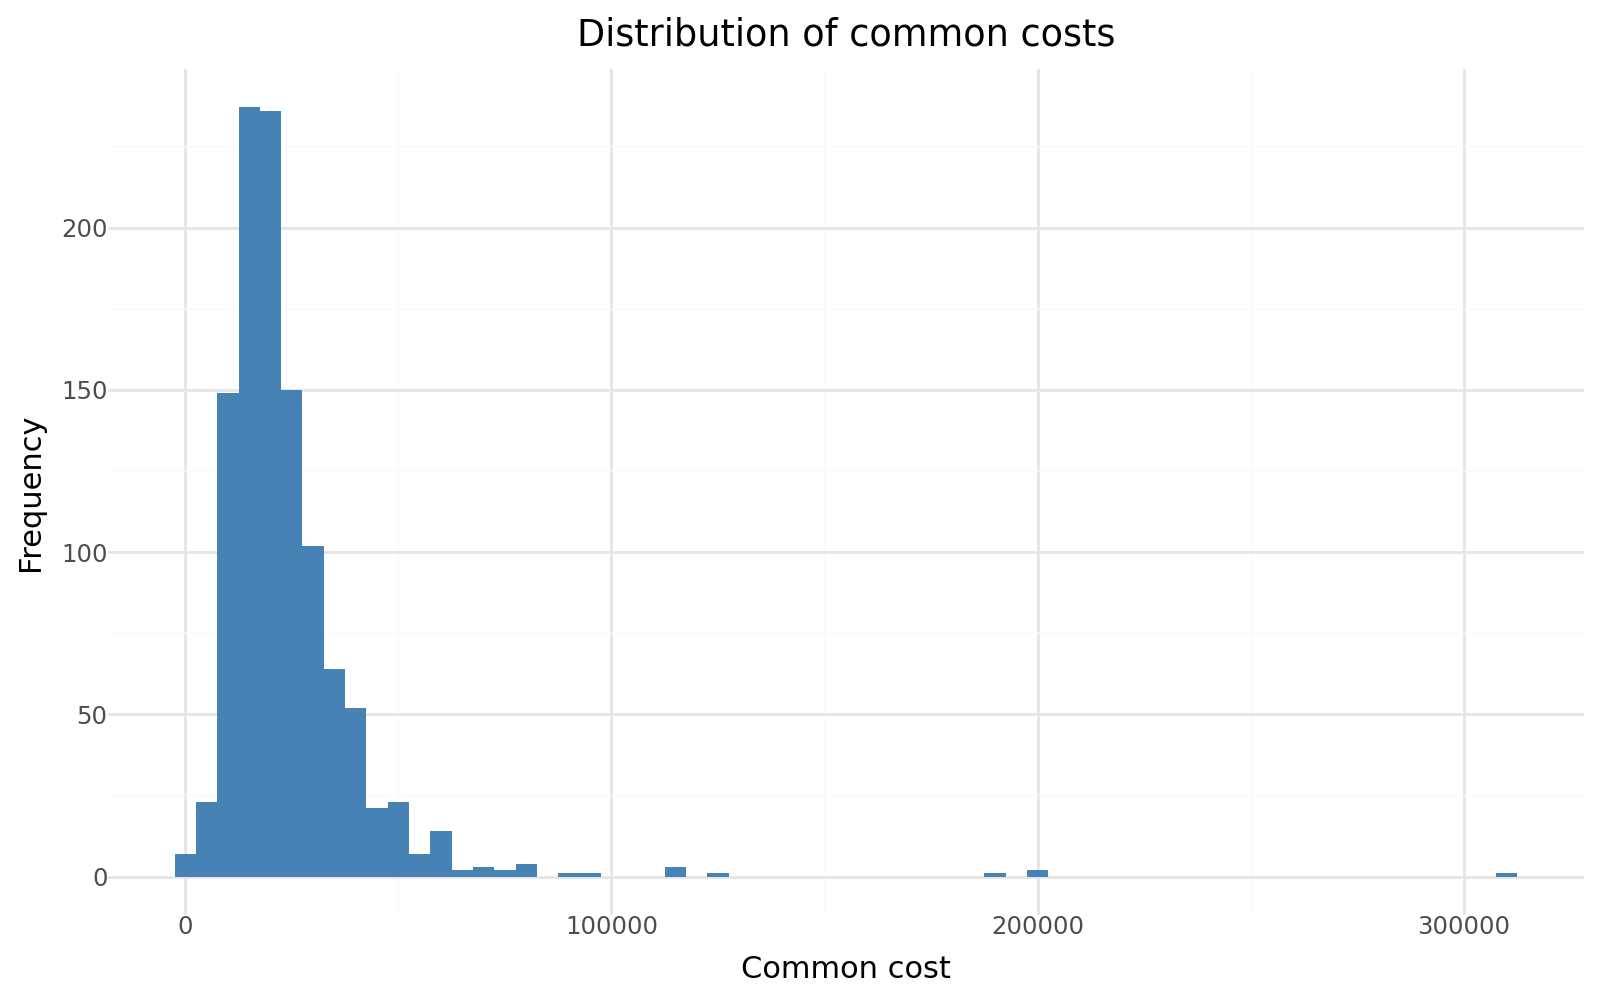

In [220]:
plot = (
    ggplot(clean, aes(x='common_cost')) +
    geom_histogram(binwidth=5000, fill='steelblue') +
    labs(title='Distribution of common costs', x='Common cost', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [221]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['common_cost'] > 100000, 'link']

,link
780,https://www.alberlet.hu//kiado_alberlet/budapest-XXIII-kerulet-szent-laszlo-utca-50m2-2-szoba_753967
1136,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-orszaghaz-utca-160m2-4-szoba_742394
1178,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-orszaghaz-utca-160m2-4-szoba_733105
1195,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-lovas-ut-105m2-3-szoba_729894
1196,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-lovas-ut-82m2-3-szoba_729890
1202,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-meder-utca-83m2-4-szoba_728289
1302,https://www.alberlet.hu//kiado_alberlet/budapest-VII-kerulet-erzsebet-korut-288m2-11-szoba_670982
1303,https://www.alberlet.hu//kiado_alberlet/budapest-V-kerulet-dorottya-utca-135m2-3-szoba_670425


I looked up the observations and the one in Szent László utca has common cost of 30 900.

In [222]:
pd.reset_option('display.max_colwidth')

In [223]:
clean.loc[(clean['common_cost'] == 309000) & (clean['street'] == 'Szent László utca'), 'common_cost'] = 30900

In [224]:
clean.common_cost.describe()

,common_cost
count,1106.000000
mean,23904.068716
std,16446.332072
min,1000.000000
25%,15000.000000
50%,20000.000000
75%,30000.000000
max,200000.000000


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 271 rows containing non-finite values.



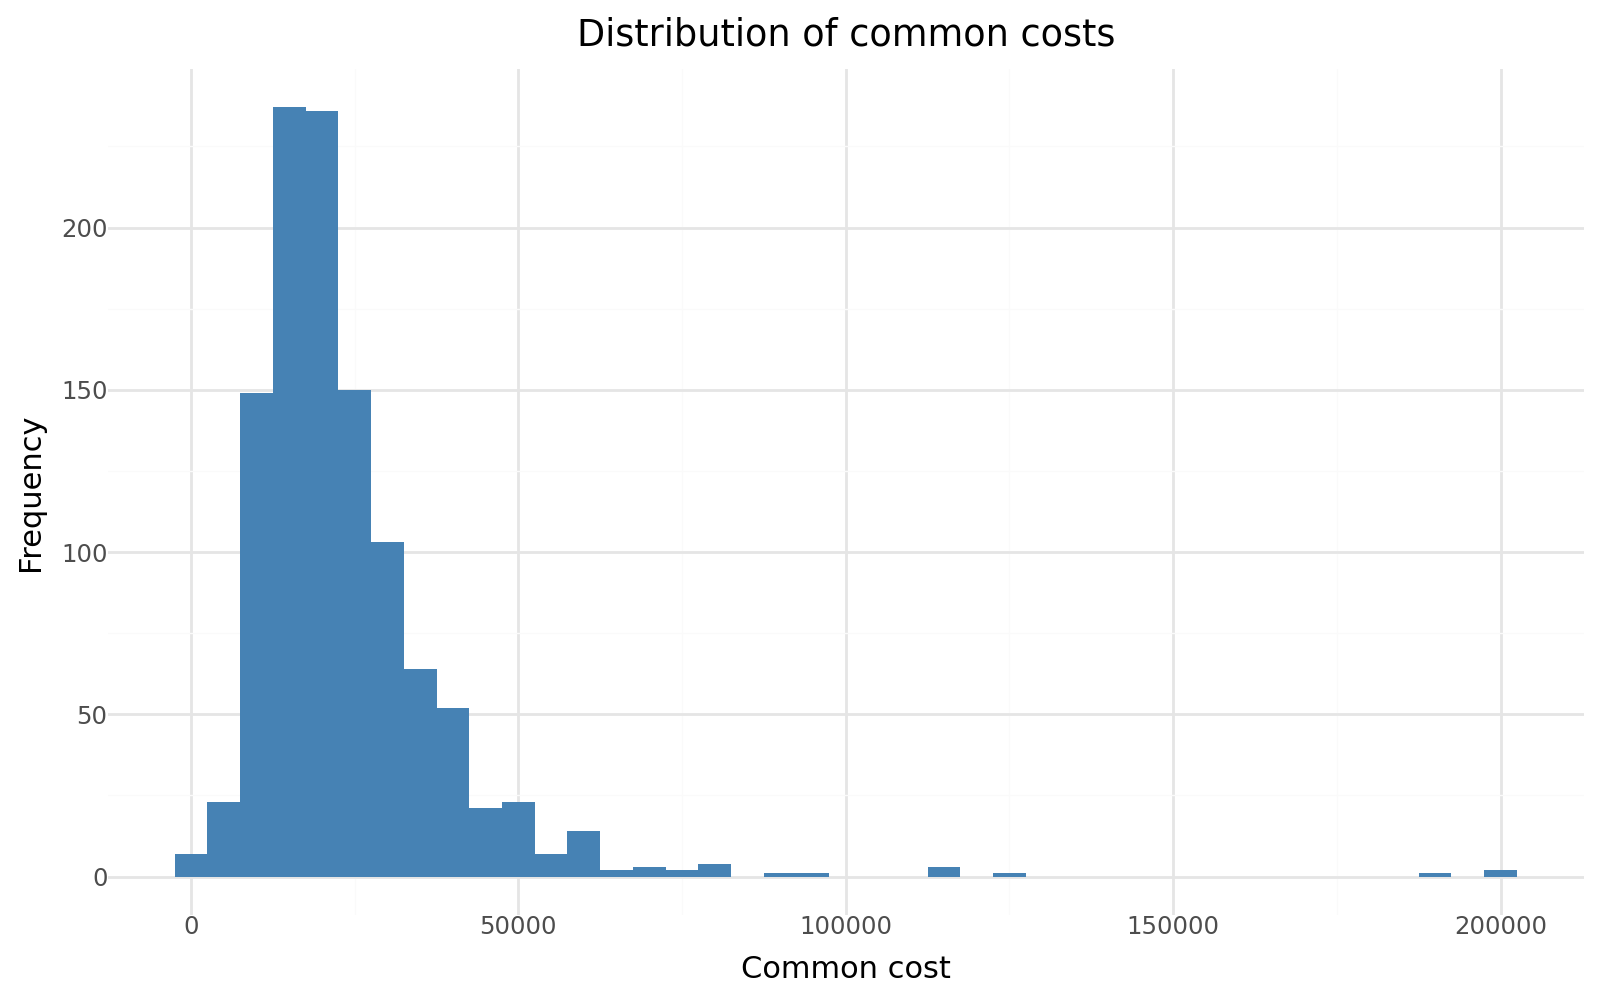

In [225]:
plot = (
    ggplot(clean, aes(x='common_cost')) +
    geom_histogram(binwidth=5000, fill='steelblue') +
    labs(title='Distribution of common costs', x='Common cost', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

**Utilities**

Cleaning the utilities variable, removing the Ft/hó part, removing extra spaces and converting it to be numeric

In [226]:
clean[['utilities', 'valami']] = clean['utilities'].str.split('Ft/hó', expand=True)
clean['utilities'] = clean['utilities'].str.replace(r'\s+', '', regex=True)
clean['utilities'] = pd.to_numeric(clean['utilities'], errors='coerce')
clean.drop(columns=['valami'], inplace=True)

<ipython-input-226-09efbc26a0ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-226-09efbc26a0ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-226-09efbc26a0ac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-226-09e

In [227]:
clean.utilities.describe().apply(lambda x: f"{x:,.0f}")

,utilities
count,881
mean,"41,664"
std,"333,789"
min,"1,000"
25%,"15,000"
50%,"20,000"
75%,"30,000"
max,"7,000,000"


In [228]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['utilities']>1000000, 'link']

,link
147,https://www.alberlet.hu//kiado_alberlet/budapest-III-kerulet-gyogyszergyar-utca-41m2-2-szoba_755941
619,https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-kelenhegyi-ut-52m2-2-szoba_754714
709,https://www.alberlet.hu//kiado_alberlet/budapest-III-kerulet-kunigunda-utja--30m2-1-szoba_754379


In [229]:
pd.reset_option('display.max_colwidth')

In [230]:
clean = clean[clean['utilities']<1000000]

In [231]:
clean.utilities.describe().apply(lambda x: f"{x:,.0f}")

,utilities
count,878
mean,"22,444"
std,"12,275"
min,"1,000"
25%,"15,000"
50%,"20,000"
75%,"30,000"
max,"110,000"


In [232]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['utilities']<1500, 'link']

,link
237,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-csata-utca-40m2-1-szoba_755773
732,https://www.alberlet.hu//kiado_alberlet/budapest-V-kerulet-muzeum-korut-56m2-3-szoba_754305
1158,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-andrassy-ut-120m2-3-szoba_737795
1222,https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-corvin-setany-33m2-1-szoba_723165
1227,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-bajcsy-zsilinszky-ut-41m2-2-szoba_722258
1255,https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_712944
1262,https://www.alberlet.hu//kiado_alberlet/budapest-V-kerulet-sorhaz-utca-185m2-4-szoba_706225
1284,https://www.alberlet.hu//kiado_alberlet/budapest-II-kerulet-torokvesz-ut-130m2-4-szoba_687935
1311,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-nagymezo-utca-97m2-3-szoba_657271
1317,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-felso-erdosor-85m2-3-szoba_647396


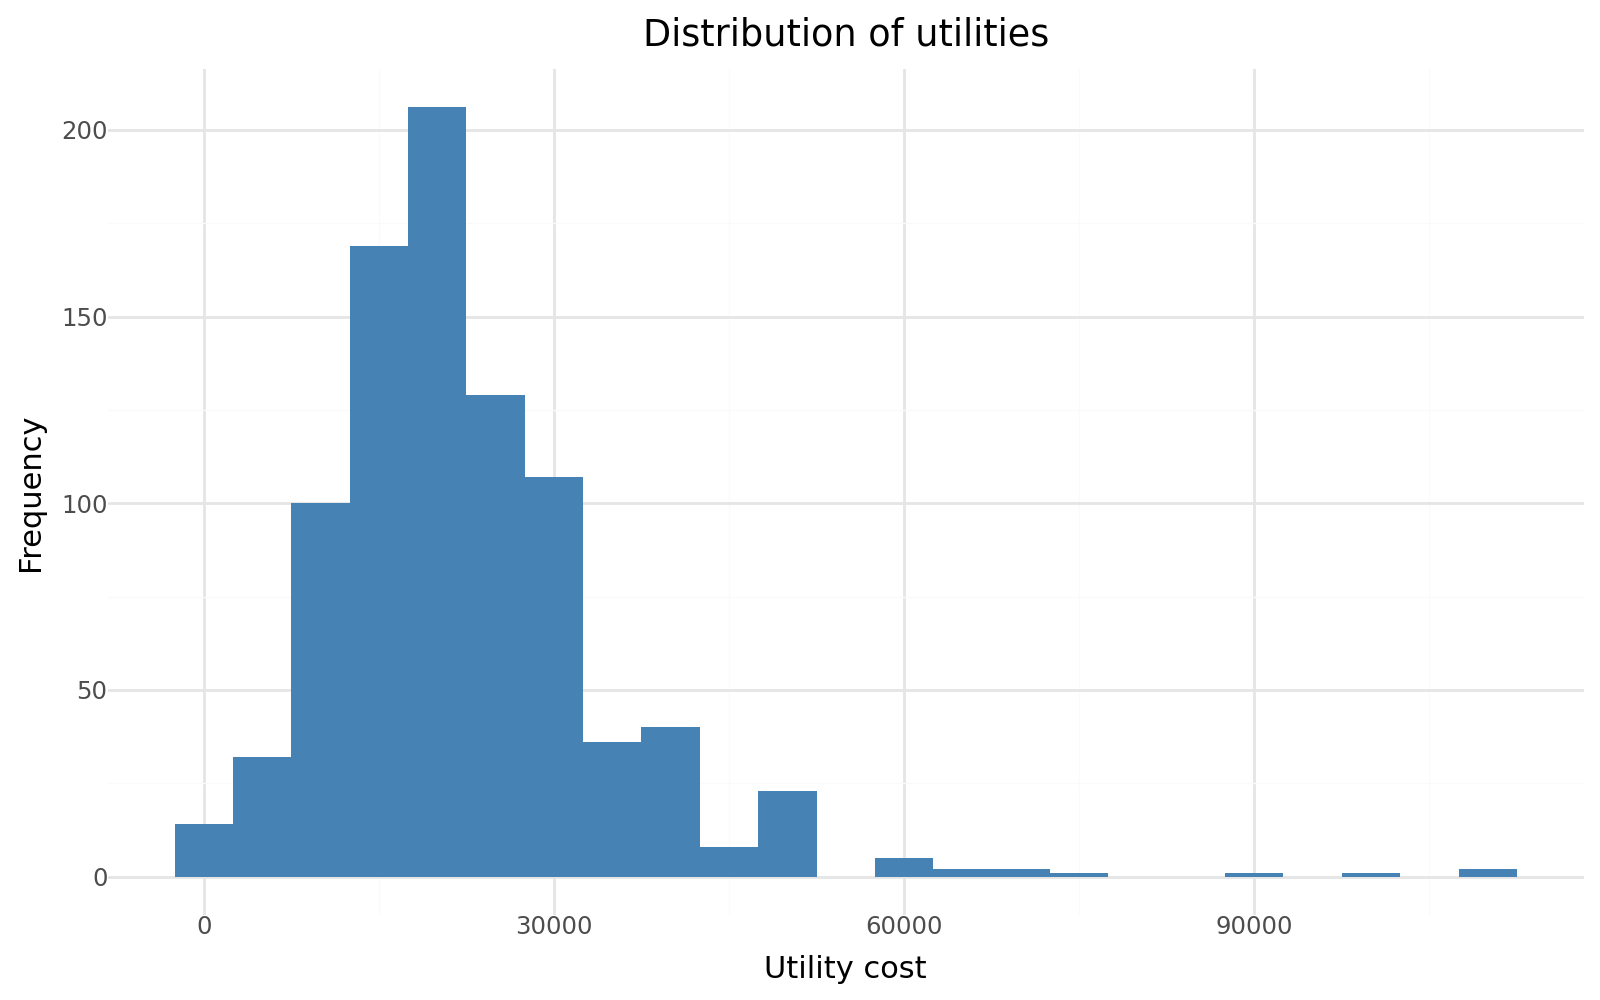

In [233]:
plot = (
    ggplot(clean, aes(x='utilities')) +
    geom_histogram(binwidth=5000, fill='steelblue') +
    labs(title='Distribution of utilities', x='Utility cost', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

**Rooms and square meter**

cleaning the rooms_and_sqrt variable. First I split it into two variable one containing the number of rooms and one containing the square meters. Then I make two columns from the number of rooms variable, one containing the number of rooms and the second containing the number of half rooms.

In [234]:
clean[['number_of_rooms', 'sqrt']] = clean['rooms_and_sqrt'].str.split(',', expand=True)

<ipython-input-234-ce061d050d63>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-234-ce061d050d63>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [235]:
clean[['meter2', 'valami']] = clean['sqrt'].str.split('m2', expand=True, n=1)
clean['meter2'] = pd.to_numeric(clean['meter2'], errors='coerce')
clean.drop(columns=['valami'], inplace=True)

<ipython-input-235-a60e30e6d583>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-235-a60e30e6d583>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-235-a60e30e6d583>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-235-a60

In [236]:
clean.meter2.describe()

,meter2
count,878.000000
mean,63.321185
std,35.908179
min,4.000000
25%,45.000000
50%,55.000000
75%,75.000000
max,650.000000


I checked the observation with 4 m^2 and in the description it is written that it is 40 m^2 so I corrected the mistake.

In [237]:
clean['meter2'] = clean['meter2'].replace(4, 40)

<ipython-input-237-41521474f7ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [238]:
clean.meter2.describe()

,meter2
count,878.000000
mean,63.362187
std,35.860887
min,12.000000
25%,45.000000
50%,55.000000
75%,75.000000
max,650.000000


In [239]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['meter2']>600, 'link']

,link
1133,https://www.alberlet.hu//kiado_alberlet/budapest-IX-kerulet-illatos-ut-650m2-10-szoba_742419


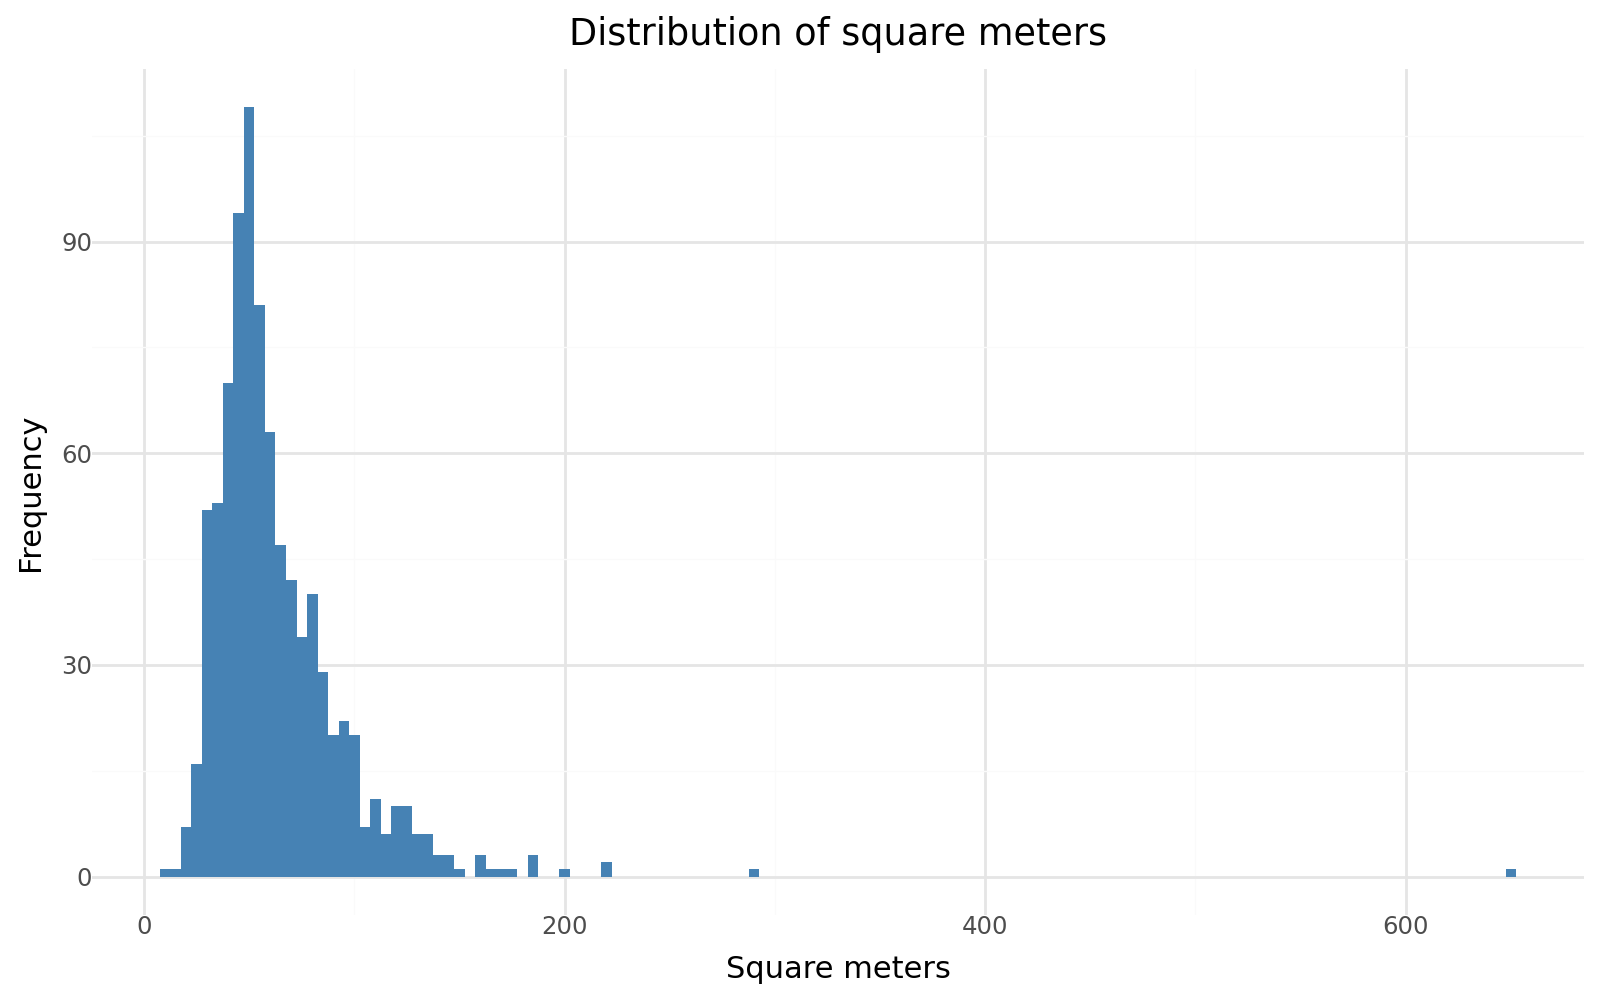

In [240]:
plot = (
    ggplot(clean, aes(x='meter2')) +
    geom_histogram(binwidth=5, fill='steelblue') +
    labs(title='Distribution of square meters', x='Square meters', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [241]:
clean[['rooms', 'halfrooms']] = clean['number_of_rooms'].str.split('+', expand=True, n=1)
clean[['n_rooms', 'room_t1']] = clean['rooms'].str.split(' ', expand=True, n=1)
clean['n_rooms'] = pd.to_numeric(clean['n_rooms'], errors='coerce')

<ipython-input-241-daeef28fe613>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-daeef28fe613>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-daeef28fe613>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-dae

In [242]:
clean.n_rooms.value_counts()

,count
n_rooms,
1,303
2,296
3,217
4,55
5,3
6,2
10,1
11,1


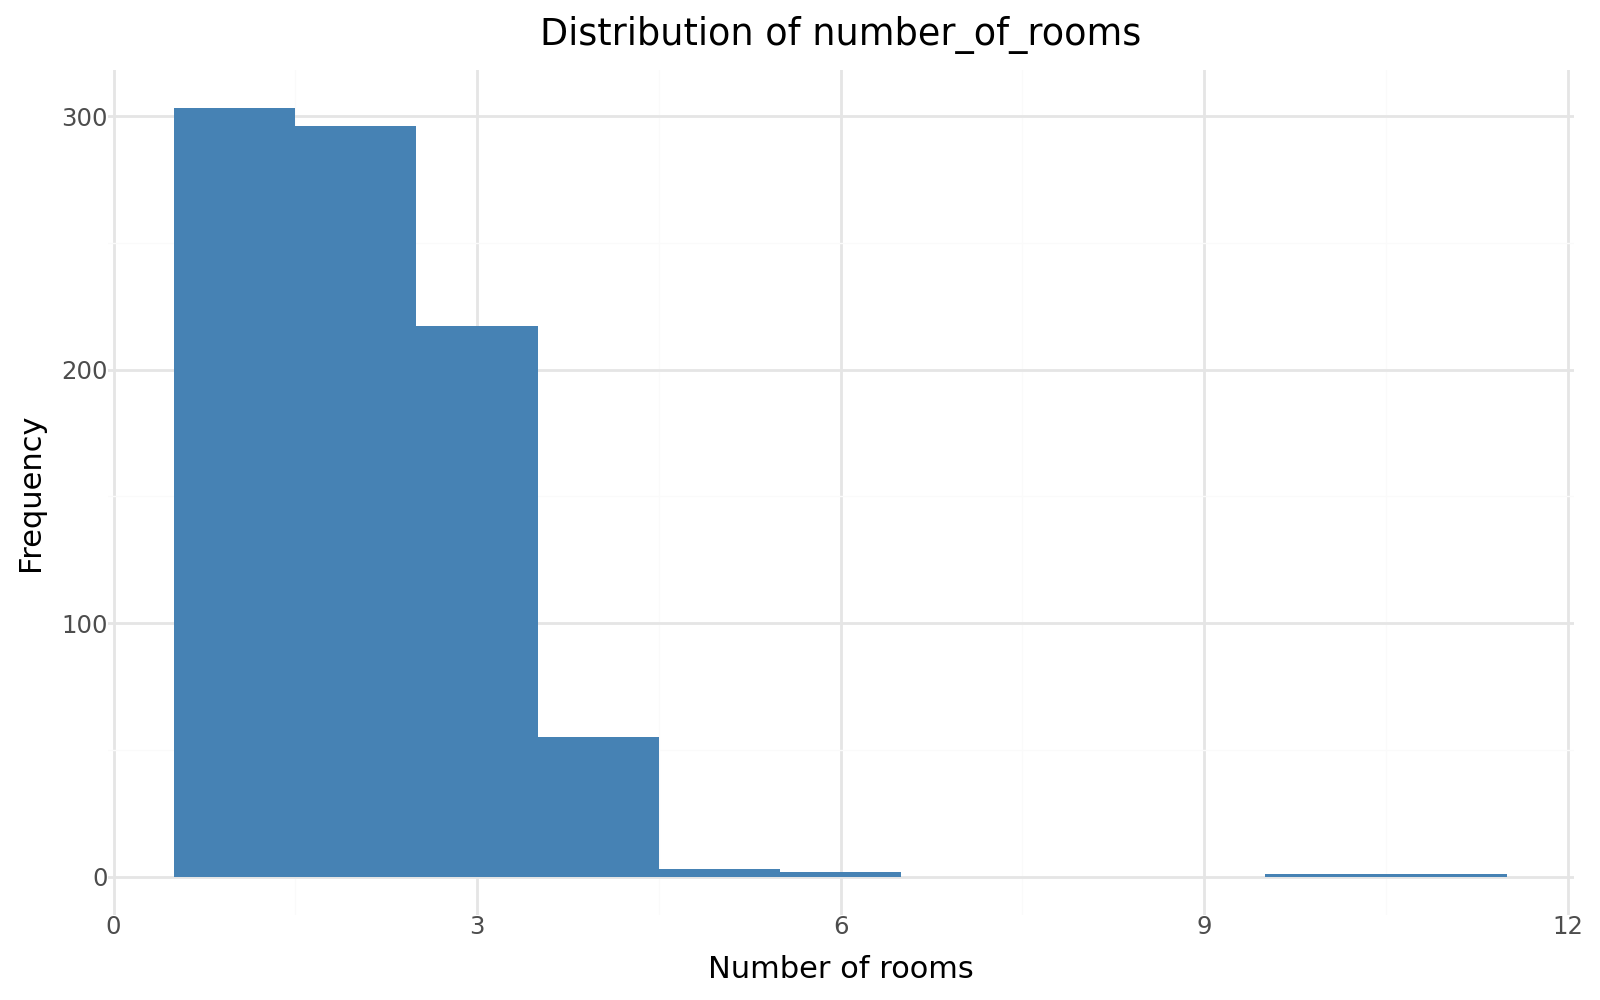

In [243]:
plot = (
    ggplot(clean, aes(x='n_rooms')) +
    geom_histogram(binwidth=1, fill='steelblue') +
    labs(title='Distribution of number_of_rooms', x='Number of rooms', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [244]:
clean.halfrooms.unique()

array([None, ' 1 félszoba', ' 2 félszoba', ' 3 félszoba'], dtype=object)

In [245]:
def categorize_halfrooms(halfroom):
    if pd.isna(halfroom):
        return 0
    elif '1' in halfroom:
        return 1
    elif '2' in halfroom:
        return 2
    elif '3' in halfroom:
        return 3
    else:
        return 0

clean['n_halfrooms'] = clean['halfrooms'].apply(categorize_halfrooms)

<ipython-input-245-cc2c34fde501>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [246]:
clean.n_halfrooms.value_counts()

,count
n_halfrooms,
0,693
1,145
2,39
3,1


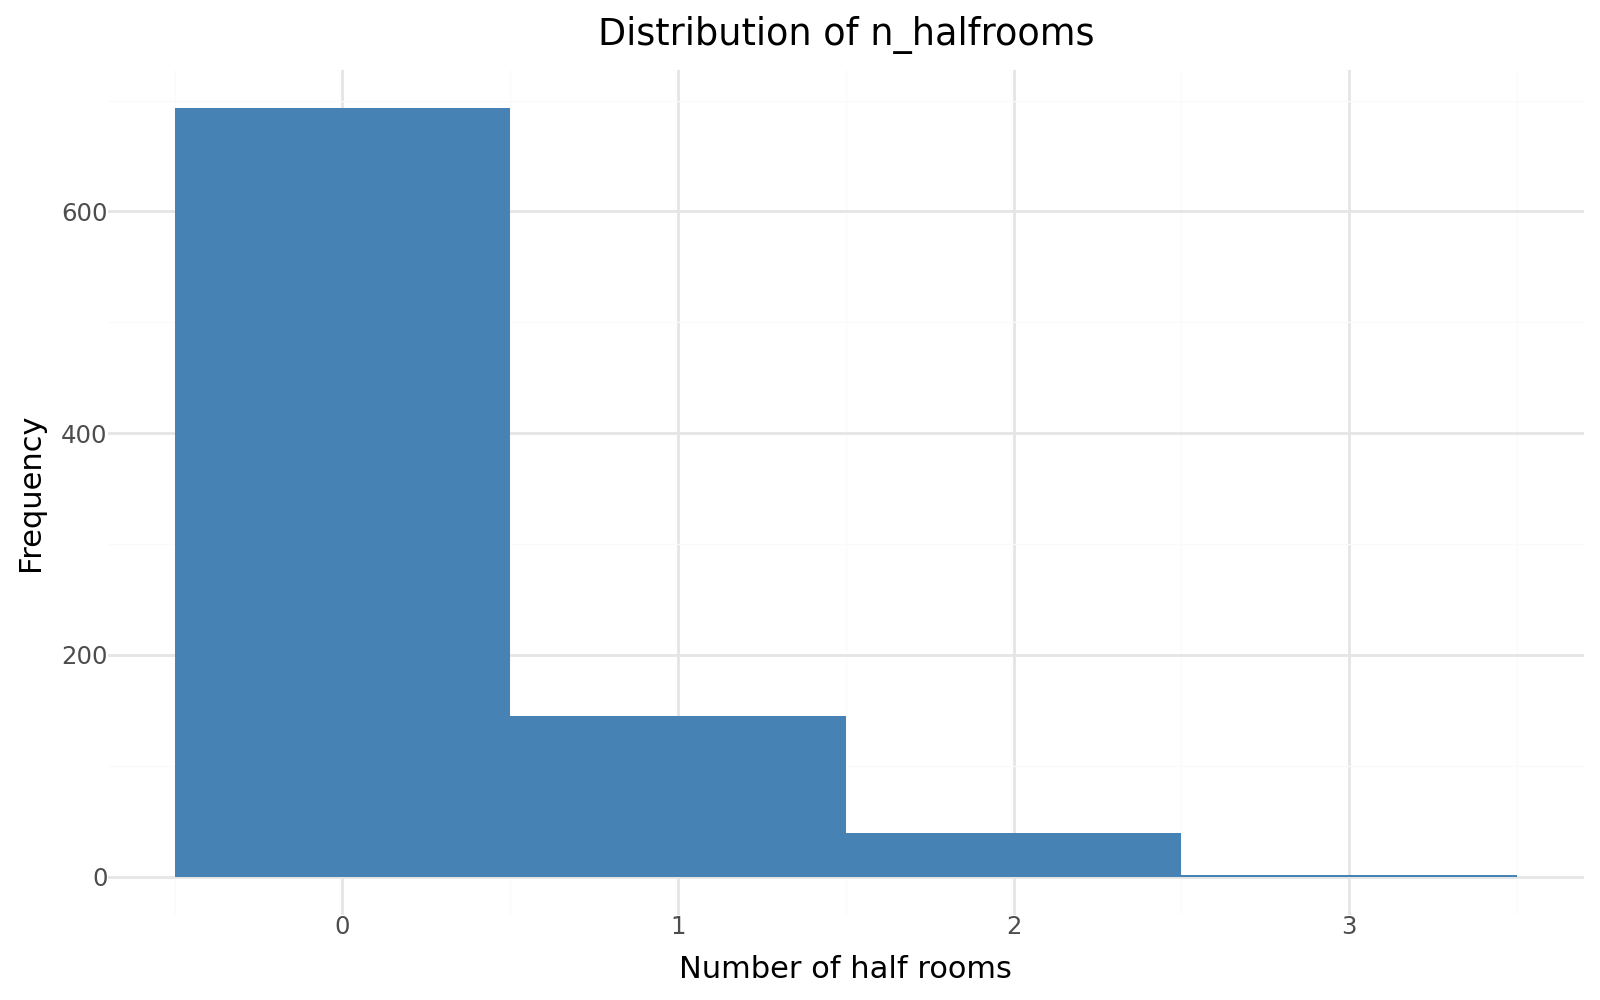

In [247]:
plot = (
    ggplot(clean, aes(x='n_halfrooms')) +
    geom_histogram(binwidth=1, fill='steelblue') +
    labs(title='Distribution of n_halfrooms', x='Number of half rooms', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [248]:
clean['total_n_rooms'] = clean['n_rooms']+0.5*clean['n_halfrooms']

<ipython-input-248-4a9c35d2c2ef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [249]:
clean['total_n_rooms'].value_counts()

,count
total_n_rooms,
2.0,266
3.0,209
1.0,194
1.5,82
4.0,56
2.5,48
3.5,13
5.0,3
4.5,3


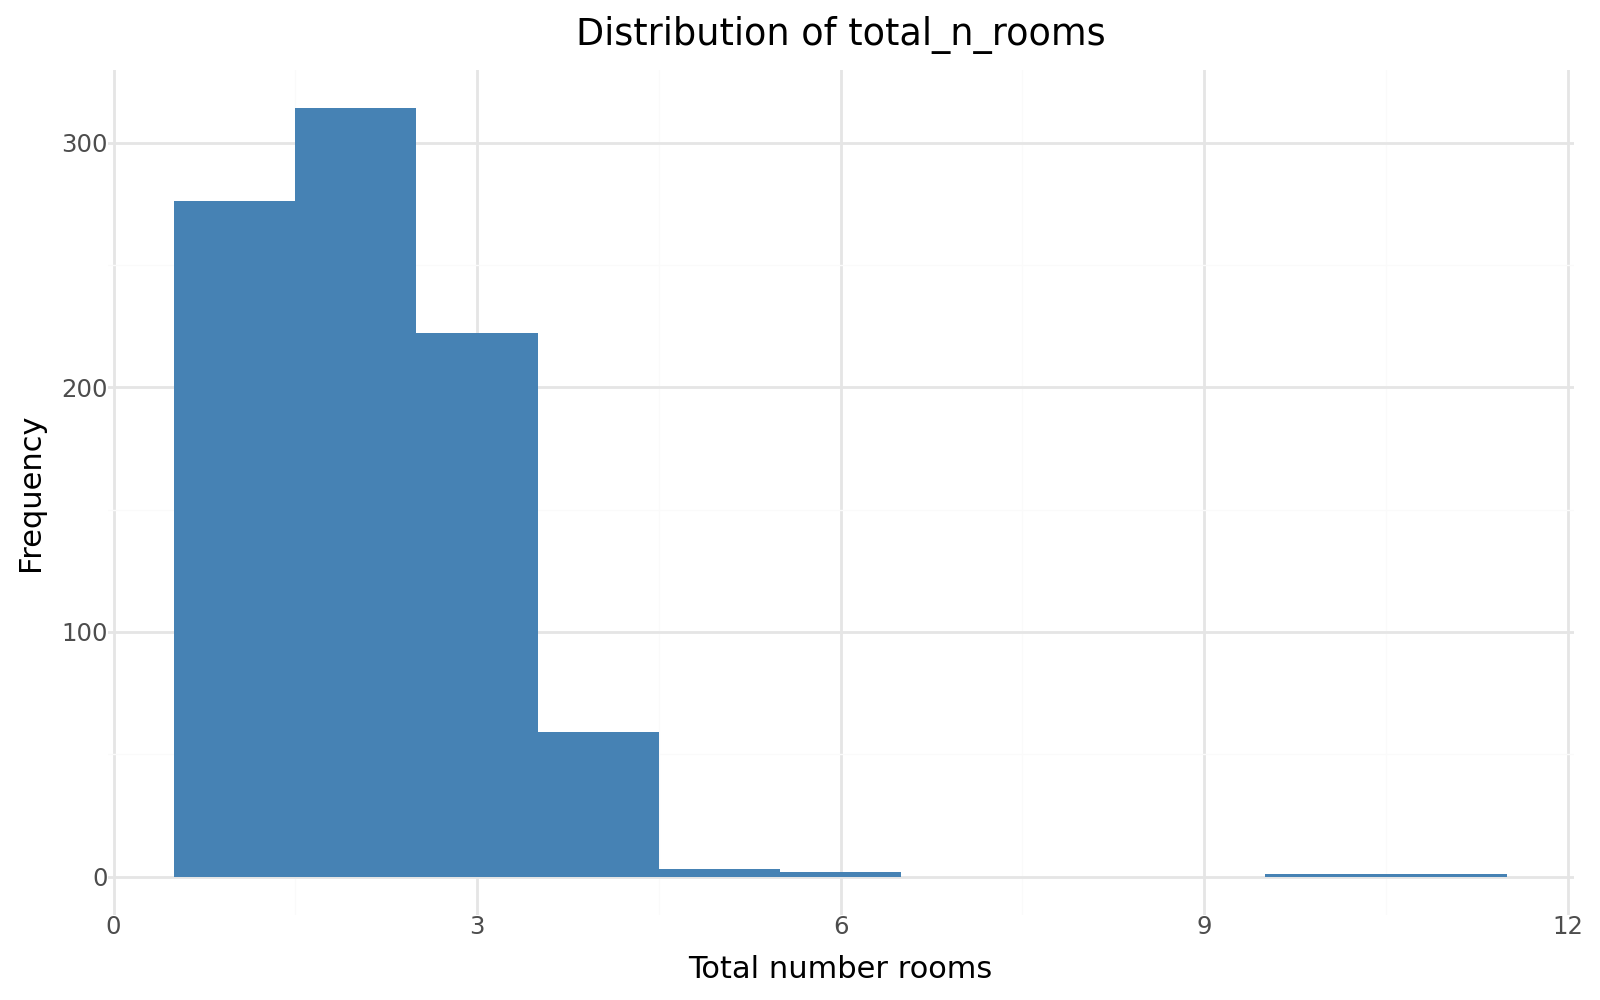

In [250]:
plot = (
    ggplot(clean, aes(x='total_n_rooms')) +
    geom_histogram(binwidth=1, fill='steelblue') +
    labs(title='Distribution of total_n_rooms', x='Total number rooms', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

**Building type**

In [251]:
clean.building_type.unique()

array(['Lakás'], dtype=object)

It is clean

**Neighbourhood**

In [252]:
clean.neighbourhood.unique()

array([nan, 'Terézváros', 'Belváros', 'Lipótváros',
       'Nagyzugló – Kerepesi úti lakótelep', 'Németvölgy',
       'Vizafogó – Marinapart', 'Alsórákos', 'Gellérthegy', 'Sasad',
       'Gloriett lakótelep', 'Angyalföld-Kertváros', 'Istvánmező',
       'Herminamező', 'Újlipótváros – Rómaikert',
       'Középső-Ferencváros – Millenniumi városközpont', 'Óbuda-Óváros',
       'Angyalföld', 'Istvántelek', 'Külső-Erzsébetváros',
       'Józsefváros – Palotanegyed', 'Erzsébetváros', 'Óbuda',
       'Kőbánya – Újhegyi lakótelep', 'Erzsébetfalva', 'Táborhegy',
       'Zöldmál', 'Belső-Erzsébetváros', 'Vizafogó', 'Országút',
       'Józsefváros – Orczynegyed', 'Albertfalva',
       'Lágymányos – Műegyetem környéke', 'Újpest',
       'József Attila lakótelep', 'Csepel-Csillagtelep', 'Békásmegyer',
       'Újlipótváros', 'Szentimreváros', 'Kelenföld',
       'Középső-Ferencváros – Rehabilitációs terület',
       'Alsórákos – Füredi utcai lakótelep', 'Virányos', 'Budatétény',
       'Angyalföld –

It is clean

**Sight**

In [253]:
clean.sight.unique()

array(['Városi panoráma', 'Udvari, világos', 'Tetőkre néző',
       'Utcai, csendes', 'Utcai és udvari', 'Udvari', 'Utcai',
       'Kertre néző', 'Panorámás', 'Parkra néző', 'Utcai, világos',
       'Hegyvidéki panoráma', 'Dunai', 'Udvari, nem világos',
       'Udvari és tűzfal', 'Térre néző', 'Utcai, forgalmas'], dtype=object)

It contains too many unnecessary variables

In [254]:
def map_sight(value):
    if pd.isna(value):
        return None
    value = value.lower()
    if 'utca' in value:
        return 'utca'
    elif 'udvar' in value:
        return 'udvar'
    elif 'park' in value:
        return 'park'
    else:
        return 'other'

In [255]:
clean['sight_small'] = clean['sight'].apply(map_sight)
clean.sight_small.unique()

<ipython-input-255-c7a6321ad1f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['other', 'udvar', 'utca', 'park'], dtype=object)

In [256]:
sight_counts = clean['sight_small'].value_counts().reset_index()
sight_counts.columns = ['sight', 'count']

import plotly.express as px
fig2 = px.bar(sight_counts, x = 'count', y = 'sight',
              title = 'Number of listings based on sight type',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

**Floor**

In [257]:
clean.floor.unique()

array(['Több mint 10', '3', '4', '1', 'Magasföldszint', 'Földszint', '2',
       '5', '10', '6', nan, '7', '8', 'Félemelet', '9', 'Szuterén',
       'Félszuterén', 'Tetőtér'], dtype=object)

In [258]:
floor_counts = clean['floor'].value_counts().reset_index()
floor_counts.columns = ['floor', 'count']

import plotly.express as px
fig2 = px.bar(floor_counts, x = 'count', y = 'floor',
              title = 'Number of listings based on the floor',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

Magasfölszint az félemelet 0,5. félemelet is 0,5. szuterén és félszuterén -1. tetőtér legyen átlag

In [259]:
def map_floor(floor):
    if floor in ['Tetőtér', 'Több mint 10']:
        return None
    elif floor == 'Földszint':
        return 0
    elif floor == 'Magasfölszint' or floor == 'Félemelet':
        return 0.5
    elif floor == 'Szuterén' or floor == 'Félszuterén':
        return -1
    else:
        return floor

clean['floor_numeric'] = clean['floor'].apply(map_floor)
clean['floor_numeric'] = pd.to_numeric(clean['floor_numeric'], errors='coerce')

<ipython-input-259-c00edd2140e8>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-259-c00edd2140e8>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This way, this column can be added to regressions as numeric variable.

In [260]:
clean.floor_numeric.value_counts()

,count
floor_numeric,
1.0,187
2.0,178
3.0,123
4.0,97
0.0,97
5.0,44
6.0,28
8.0,15
7.0,14


**Heating type**

In [261]:
clean.heating_type.unique()

array(['Távfűtés', 'Cirkó', 'Házközponti', 'Gázkazán',
       'Házközp. mérőórával', 'Gáz, konvektor', 'Villany, infrapanel',
       'Gáz, héra', 'Villany, Nobo panel', 'Klíma', 'Távfűtés mérőórával',
       'Hőszivattyú', 'Elektromos', 'Mennyezeti hűtés-fűtés',
       'Villany, hőtárolós kályha', 'Padlófűtés', 'Falfűtés', 'Egyéb',
       'Gáz, MIKA kazán', 'Fan-coil', 'Egyéb kazán', 'Hősugárzó'],
      dtype=object)

In [262]:
heating_counts = clean['heating_type'].value_counts().reset_index()
heating_counts.columns = ['heating', 'count']

import plotly.express as px
fig2 = px.bar(heating_counts, x = 'count', y = 'heating',
              title = 'Number of listings based on the heating type',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

In [263]:
def map_heating(heating_type):
    if heating_type in ['Házközponti', 'Házközp. mérőórával']:
        return 'Házközponti'
    elif heating_type in ['Távfűtés', 'Távfűtés mérőórával']:
        return 'Távfűtés'
    elif heating_type in ['Cirkó', 'Gázkonvektor', 'Gázkazán', 'Gáz, MIKA kazán', 'Gáz, héra']:
        return 'Gáz alapú'
    elif heating_type in ['Elektromos', 'Villany, Nobo panel', 'Villany, infrapanel', 'Hősugárzó']:
        return 'Elektromos'
    elif heating_type in ['Padlófűtés', 'Mennyezeti hűtés-fűtés', 'Klíma', 'Fan-coil']:
        return 'Padló vagy mennyezeti'
    elif heating_type in ['Egyéb kazán', 'Egyéb', 'Villany, hőtárolós kályha', 'Falfűtés', 'Hőszivattyú']:
        return 'Other'
    else:
        return 'Unknown'

clean['heating_small'] = clean['heating_type'].apply(map_heating)

<ipython-input-263-c5a5cf81a2db>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [264]:
heating_counts = clean['heating_small'].value_counts().reset_index()
heating_counts.columns = ['heating', 'count']

import plotly.express as px
fig2 = px.bar(heating_counts, x = 'count', y = 'heating',
              title = 'Number of listings based on the heating type',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

**Furniture**

In [265]:
clean.furniture.unique()

array(['Részben berendezett, gépesített', 'Berendezett, gépesített',
       'Üres, gépesített', 'Berendezett, üresen is',
       'Berendezett, új bútorok', nan, 'Berendezett, IKEA, KIKA',
       'Részben berendezett', 'Berendezett, lakberendező által', 'Luxus',
       'Üres, berendezve is', 'Üres', 'Berendezett, nem gépesített'],
      dtype=object)

In [266]:
furniture_counts = clean['furniture'].value_counts().reset_index()
furniture_counts.columns = ['furniture', 'count']

import plotly.express as px
fig2 = px.bar(furniture_counts, x = 'count', y = 'furniture',
              title = 'Number of listings based on the furnishment',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

In [267]:
def categorize_furnished(furniture):
    if pd.isna(furniture):
        return 'Na'
    elif 'üres' in furniture:
        return 'üres'
    elif 'részben' in furniture:
        return 'részben'
    else:
        return 'berendezett'

def categorize_machines(furniture):
    if pd.isna(furniture):
        return 'nem gépesített'
    elif 'gépesített' in furniture:
        return 'gépesített'
    else:
        return 'nem gépesített'

clean['furnished'] = clean['furniture'].apply(categorize_furnished)
clean['machines'] = clean['furniture'].apply(categorize_machines)

<ipython-input-267-3973412a3280>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-267-3973412a3280>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [268]:
furniture_counts = clean['furnished'].value_counts().reset_index()
furniture_counts.columns = ['furniture', 'count']

import plotly.express as px
fig2 = px.bar(furniture_counts, x = 'count', y = 'furniture',
              title = 'Number of listings based on the furnishment',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

In [269]:
machines_counts = clean['machines'].value_counts().reset_index()
machines_counts.columns = ['machines', 'count']

import plotly.express as px
fig2 = px.bar(machines_counts, x = 'count', y = 'machines',
              title = 'Number of listings based on the machines',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

**Elavator**

In [270]:
clean.elavator.value_counts()

,count
elavator,
Van,551
Nincs,37


# **Modelling**

In [274]:
clean['lnprice']=np.log(clean['price'])

<ipython-input-274-31bfd564f410>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [275]:
clean["utca"] = (clean["sight_small"] == 'utca').astype(int)
clean["other"] = (clean["sight_small"] == 'other').astype(int)
clean["udvar"] = (clean["sight_small"] == 'udvar').astype(int)
clean["park"] = (clean["sight_small"] == 'park').astype(int)

<ipython-input-275-829eab7efa1d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-275-829eab7efa1d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-275-829eab7efa1d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-275-829

In [276]:
clean["american_kitchen01"] = (clean["american_kitchen"] == 'Van').astype(int)

<ipython-input-276-08b507a85392>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [277]:
clean["balcony1"] = (clean["number_of_balconies"] == '1').astype(int)
clean["balcony2"] = (clean["number_of_balconies"] == '2').astype(int)
clean["balcony3"] = (clean["number_of_balconies"] == '3').astype(int)

clean["balcony"] = clean["number_of_balconies"].apply(lambda x: 1 if str(x) in ["1", "2", "3"] else 0)

<ipython-input-277-3b2b222ad2de>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-277-3b2b222ad2de>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-277-3b2b222ad2de>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-277-3b2

In [278]:
clean["district1"] = (clean["district"] == ' I. kerület').astype(int)
clean["district2"] = (clean["district"] == ' II. kerület').astype(int)
clean["district3"] = (clean["district"] == ' III. kerület').astype(int)
clean["district4"] = (clean["district"] == ' IV. kerület').astype(int)
clean["district5"] = (clean["district"] == ' V. kerület').astype(int)
clean["district6"] = (clean["district"] == ' VI. kerület').astype(int)
clean["district7"] = (clean["district"] == ' VII. kerület').astype(int)
clean["district8"] = (clean["district"] == ' VIII. kerület').astype(int)
clean["district9"] = (clean["district"] == ' IX. kerület').astype(int)
clean["district10"] = (clean["district"] == ' X. kerület').astype(int)
clean["district11"] = (clean["district"] == ' XI. kerület').astype(int)
clean["district12"] = (clean["district"] == ' XII. kerület').astype(int)
clean["district13"] = (clean["district"] == ' XIII. kerület').astype(int)
clean["district14"] = (clean["district"] == ' XIV. kerület').astype(int)
clean["district15"] = (clean["district"] == ' XV. kerület').astype(int)
clean["district16"] = (clean["district"] == ' XVI. kerület').astype(int)
clean["district17"] = (clean["district"] == ' XVII. kerület').astype(int)
clean["district18"] = (clean["district"] == ' XVIII. kerület').astype(int)
clean["district19"] = (clean["district"] == ' XIX. kerület').astype(int)
clean["district20"] = (clean["district"] == ' XX. kerület').astype(int)
clean["district21"] = (clean["district"] == ' XXI. kerület').astype(int)
clean["district22"] = (clean["district"] == ' XXII. kerület').astype(int)
clean["district23"] = (clean["district"] == ' XXIII. kerület').astype(int)

<ipython-input-278-c1ffdaa287f7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-278-c1ffdaa287f7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-278-c1ffdaa287f7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-278-c1f

In [279]:
clean["elavator1"] = (clean["elavator"] == 'Van').astype(int)

<ipython-input-279-8afb18bacf5a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [280]:
clean["elavator1"].value_counts()

,count
elavator1,
1,551
0,327


In [281]:
clean["gaz"] = (clean["heating_small"] == 'Házközponti').astype(int)
clean["tav"] = (clean["heating_small"] == 'Távfűtés').astype(int)
clean["padlomenny"] = (clean["heating_small"] == 'Padló vagy mennyezeti').astype(int)
clean["elektromos"] = (clean["heating_small"] == 'Elektromos').astype(int)

<ipython-input-281-43764d9b973a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-281-43764d9b973a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-281-43764d9b973a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-281-437

In [285]:
clean["gepesitett"] = (clean["machines"] == 'gépesített').astype(int)

<ipython-input-285-cffadb6344c8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
clean["berendezett"] = (clean["furniture"] == 'berendezett').astype(int)

<ipython-input-286-8cbd46e296e8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
formula = (
    "lnprice ~  utilities + common_cost + american_kitchen01 + "
    "floor_numeric + elavator1 + meter2 + n_rooms + n_halfrooms + balcony1 + "
    "balcony2 + balcony3 + other + udvar + park + district1 + district2 + "
    "district3 + district4 + district5 + district6 + district7 + district8 + "
    "district9 + district10 + district11 + district12 + district14 + "
    "district15 + district16 + district17 + district18 + district19 + "
    "district20 + district21 + district22 + district23 + gaz + tav + padlomenny + "
    "elektromos + berendezett + gepesitett"
)

log = smf.ols(formula=formula, data=clean).fit(cov_type="HC1")
log.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 42, but rank is 36



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          3.35e-295
Time:                        11:44:00   Log-Likelihood:                -72.799
No. Observations:                 776   AIC:                             219.6
Df Residuals:                     739   BIC:                             391.8
Df Model:                          36                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.7707      0.063    185.971      0.000      11.647      11.895
utilities           3.312e-06   1.15e-06      2.886      0.004    1.06e-06    5.56e-06
common_cost         3.094e-06    1.5e-06      2.068      0.039    1.62e-07    6.03e-06
american_kitchen01     0.1098      0.024      4.574      0.000       0.063       0.157
floor_numeric          0.0172      0.005      3.207      0.001       0.007       0.028
elavator1              0.0628      0.027      2.363      0.018       0.011       0.115
meter2                 0.0038      0.002      1.528      0.126      -0.001       0.009
n_rooms                0.1693      0.051      3.334      0.001       0.070       0.269
n_halfrooms            0.0809      0.032      2.536      0.011       0.018       0.143
balcony1           -5.697e-16    1.5e-16     -3.792      0.000   -8.64e-16   -2.75e-16
balcony2            3.859e-16   2.03e-16      1.899      0.058   -1.24e-17    7.84e-16
balcony3             3.25e-16   1.42e-16      2.285      0.022    4.63e-17    6.04e-16
other                  0.1099      0.028      3.961      0.000       0.056       0.164
udvar                 -0.0747      0.026     -2.909      0.004      -0.125      -0.024
park                   0.0052      0.032      0.164      0.870      -0.057       0.068
district1              0.1193      0.076      1.563      0.118      -0.030       0.269
district2              0.1773      0.059      2.982      0.003       0.061       0.294
district3             -0.1221      0.046     -2.629      0.009      -0.213      -0.031
district4             -0.1558      0.046     -3.420      0.001      -0.245      -0.067
district5              0.2816      0.052      5.378      0.000       0.179       0.384
district6              0.1815      0.049      3.726      0.000       0.086       0.277
district7             -0.0453      0.048     -0.940      0.347      -0.140       0.049
district8              0.0202      0.040      0.499      0.618      -0.059       0.099
district9             -0.0927      0.043     -2.136      0.033      -0.178      -0.008
district10            -0.2242      0.057     -3.949      0.000      -0.336      -0.113
district11            -0.0415      0.034     -1.221      0.222      -0.108       0.025
district12             0.0972      0.052      1.882      0.060      -0.004       0.198
district14            -0.1654      0.035     -4.776      0.000      -0.233      -0.098
district15            -0.2011      0.130     -1.548      0.122      -0.456       0.053
district16            -0.2215      0.072     -3.056      0.002      -0.364      -0.079
district17           7.65e-17   5.12e-17      1.495      0.135   -2.38e-17    1.77e-16
district18             0.0050      0.068      0.074      0.941      -0.127       0.137
district19            -0.2727      0.0

In [288]:
formula = (
    "lnprice ~  utilities + common_cost + american_kitchen01 + "
    "floor_numeric + elavator1 + meter2 + n_rooms + n_halfrooms + balcony + "
    "district1 + district2 + district3 + district4 + district5 + district6 + district7 + district8 +"
    "district9 + district10 + district11 + district12 + district14 + district15 + district16 + district17 + district18 + district19 + "
    "district20 + district21 + district22 + district23 + gaz + tav + padlomenny + "
    "elektromos + berendezett + gepesitett"
)

log = smf.ols(formula=formula, data=clean).fit(cov_type="HC1")
log.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 37, but rank is 33



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          5.27e-293
Time:                        11:44:06   Log-Likelihood:                -91.917
No. Observations:                 776   AIC:                             251.8
Df Residuals:                     742   BIC:                             410.1
Df Model:                          33                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.7409      0.061    193.704      0.000      11.622      11.860
utilities           3.176e-06   1.18e-06      2.701      0.007    8.71e-07    5.48e-06
common_cost         3.613e-06   1.54e-06      2.343      0.019     5.9e-07    6.64e-06
american_kitchen01     0.1236      0.025      4.988      0.000       0.075       0.172
floor_numeric          0.0236      0.006      4.210      0.000       0.013       0.035
elavator1              0.0613      0.027      2.276      0.023       0.009       0.114
meter2                 0.0038      0.003      1.505      0.132      -0.001       0.009
n_rooms                0.1795      0.053      3.418      0.001       0.077       0.282
n_halfrooms            0.0866      0.033      2.633      0.008       0.022       0.151
balcony                 1e-15   1.51e-16      6.627      0.000    7.04e-16     1.3e-15
district1              0.1222      0.076      1.610      0.107      -0.027       0.271
district2              0.2172      0.063      3.461      0.001       0.094       0.340
district3             -0.1111      0.048     -2.293      0.022      -0.206      -0.016
district4             -0.1678      0.043     -3.911      0.000      -0.252      -0.084
district5              0.2529      0.053      4.801      0.000       0.150       0.356
district6              0.1452      0.049      2.985      0.003       0.050       0.241
district7             -0.0879      0.050     -1.758      0.079      -0.186       0.010
district8             -0.0125      0.042     -0.300      0.764      -0.094       0.069
district9             -0.1117      0.044     -2.553      0.011      -0.197      -0.026
district10            -0.1715      0.053     -3.256      0.001      -0.275      -0.068
district11            -0.0286      0.034     -0.846      0.398      -0.095       0.038
district12             0.1320      0.053      2.482      0.013       0.028       0.236
district14            -0.1641      0.034     -4.764      0.000      -0.232      -0.097
district15            -0.1747      0.124     -1.406      0.160      -0.418       0.069
district16            -0.2420      0.069     -3.488      0.000      -0.378      -0.106
district17          1.761e-16   1.31e-17     13.463      0.000     1.5e-16    2.02e-16
district18            -0.0466      0.064     -0.734      0.463      -0.171       0.078
district19            -0.2690      0.075     -3.568      0.000      -0.417      -0.121
district20            -0.3073      0.058     -5.340      0.000      -0.420      -0.195
district21            -0.3650      0.127     -2.881      0.004      -0.613      -0.117
district22            -0.2173      0.073     -2.973      0.003      -0.361      -0.074
district23          2.152e-16   4.26e-17      5.048      0.000    1.32e-16    2.99e-16
gaz                    0.0354      0.0